<div style="background-color:#ffcc00;"><span style="color:navy;">Importing Libraries</span></div>

In [238]:
import pandas as pd
import numpy as np
import urllib
import matplotlib.pyplot as plt

<div style="background-color:#ffcc00;"><span style="color:navy;">Loading the dataset and initial analysis</span></div>

In [239]:
books = pd.read_csv('book_data.csv',error_bad_lines = False) 
#error_bad_lines : boolean, default True Lines with too many fields (e.g. a csv line with too many commas) will by default cause an exception to be raised, and no DataFrame will be returned. If False, then these “bad lines” will dropped from the DataFrame that is returned. (Only valid with C parser)

In [240]:
print("There are {} rows and {} columns in the dataset.".format(books.shape[0], books.shape[1]))

There are 54301 rows and 12 columns in the dataset.


In [241]:
#columns
np.array(books.columns)

array(['book_authors', 'book_desc', 'book_edition', 'book_format',
       'book_isbn', 'book_pages', 'book_rating', 'book_rating_count',
       'book_review_count', 'book_title', 'genres', 'image_url'],
      dtype=object)

<span style="color:#747678; font-size:14px;">Columns are <strong>'book_authors', 'book_desc', 'book_edition', 'book_format',
       'book_isbn', 'book_pages', 'book_rating', 'book_rating_count',
    'book_review_count', 'book_title', 'genres', 'image_url'</strong></span>

In [242]:
books.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...


<div style="background-color:#ffcc00;"><span style="color:navy;">removing useless columns</span></div>

In [243]:
del books['book_format']

In [244]:
del books['book_isbn']

<div style="background-color:#ffcc00;"><span style="color:navy;">checking for null cells</span></div>

In [245]:
#columns which contain null values and the number of null elements
null_counts = books.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) #null_counts in each column (sorted)

book_edition    48848
genres           3242
book_pages       2522
book_desc        1331
image_url         683
dtype: int64

In [246]:
#books = books[books['book_title'].notna()] #removing nulls in book_title column
print("rows before filtering null genres: {}".format(books.shape[0]))
books = books[books['genres'].notna()] #removing nulls in genres column
print("rows after filtering null genres: {}".format(books.shape[0]))

rows before filtering null genres: 54301
rows after filtering null genres: 51059


<div style="background-color:#ffcc00;"><span style="color:navy;">removing duplicate rows (based on title)</span></div>

In [247]:
print("rows before filtering duplicate row based on title: {}".format(books.shape[0]))
books.drop_duplicates(subset ="book_title",
                     keep = False, inplace = True)
print("rows after filtering duplicate row based on title: {}".format(books.shape[0]))

rows before filtering duplicate row based on title: 51059
rows after filtering duplicate row based on title: 41837


<div style="background-color:#ffcc00;"><span style="color:navy;">removing "pages" from column "book_pages"</span></div>

In [248]:
books['book_pages'].isnull().sum()#null values in book_pages column

1683

In [249]:
page_column = np.zeros(books.shape[0])
null_T_F = list(books['book_pages'].isnull())
for i in range(books.shape[0]):
    if not null_T_F[i]:
        pages = str(books.iloc[i]['book_pages']).split(" ")[0]
        page_column[i]  = int(pages)
    else:
        page_column[i]  = 0

In [250]:
books['book_pages'] = page_column #setting the pages column as the number of pages (removing string "pages")

In [251]:
#books['book_pages']

<div style="background-color:#ffcc00;"><span style="color:navy;">lowercasing "book_authors" and "book_title" and "books_desc" columns</span></div>

In [252]:
books['book_authors'] = books['book_authors'].str.lower()
books['book_title'] = books['book_title'].str.lower()
books['book_desc'] = books['book_desc'].str.lower()

<div style="background-color:#ffcc00;"><span style="color:navy;">checking for url exist for all rows of "image_url"</span></div>

In [253]:
books = books[books['image_url'].notna()] #removing nulls in genres column

In [254]:
print("rows after filtering null based on image url: {}".format(books.shape[0]))

rows after filtering null based on image url: 41498


<div style="background-color:#ffcc00;"><span style="color:navy;">Adding a column indicating whether the book is amazon favorite or not.</span></div>

In [255]:
#amzn = pd.read_csv('../data/bestsellers_with_categories.csv',error_bad_lines = False) 
amzn = pd.read_csv('bestsellers_with_categories.csv',error_bad_lines = False) 
amzn.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [256]:
in_amzn = []
for i, j in books.iterrows():
    if j['book_title'] in list(amzn['Name']):
        j['book_title'] = j['book_title'].lower()
        in_amzn.append(1)
    else:
        in_amzn.append(0)
books['Amzn_rcmd']=in_amzn
books.head()
print(sum(books['Amzn_rcmd']))

0


<div style="background-color:#ffcc00;"><span style="color:navy;">saving the processed dataset</span></div>

In [257]:
df = pd.DataFrame(books)
df.to_csv("filtered_books.csv", index=True)

In [259]:
pd.read_csv("filtered_books.csv")

,Unnamed: 0,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,Amzn_rcmd
0,1,j.k. rowling|mary grandpré,there is a door at the end of a silent corrido...,US Edition,870.0,4.48,2041594,33264,harry potter and the order of the phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,0
1,9,j.r.r. tolkien,لجزء الثالث من ملحمة جيه أر أر تولكين الرائعة ...,Hobbit Movie Tie-in Boxed set,1728.0,4.59,99793,1652,j.r.r. tolkien 4-book boxed set: the hobbit an...,Fantasy|Fiction|Classics,https://images.gr-assets.com/books/1346072396l...,0
2,11,douglas adams,seconds before the earth is demolished to make...,NaN,193.0,4.21,1155911,23919,the hitchhiker's guide to the galaxy,Science Fiction|Fiction|Humor|Fantasy|Classics,https://images.gr-assets.com/books/1388282444l...,0
3,12,shel silverstein,"""once there was a tree...and she loved a littl...",NaN,64.0,4.37,789681,15694,the giving tree,Childrens|Childrens|Picture Books|Classics|Fic...,https://images.gr-assets.com/books/1174210942l...,0
4,14,dan brown,an ingenious code hidden in the works of leona...,NaN,481.0,3.81,1668594,43699,the da vinci code,Fiction|Mystery|Thriller,https://images.gr-assets.com/books/1303252999l...,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41493,54296,howard megdal,"in this fearless and half-crazy story, howard ...",NaN,256.0,3.37,27,9,taking the field: a fan's quest to run the tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...,0
41494,54297,howard megdal,from the icons of the game to the players who ...,NaN,256.0,3.97,34,5,"the baseball talmud: koufax, greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...,0
41495,54298,howard megdal,NaN,NaN,0.0,3.66,32,3,"wilpon's folly - the story of a man, his fortu...",Sports|Baseball|Abandoned,https://images.gr-assets.com/books/1394277097l...,0
41496,54299,mimi baird|eve claxton,"soon to be a major motion picture, from brad p...",NaN,272.0,3.82,867,187,he wanted the moon: the madness and medical ge...,Nonfiction|Autobiography|Memoir|Biography|Psyc...,https://images.gr-assets.com/books/1403192135l...,0


<div style="background-color:#ffcc00;"><span style="color:navy;">analysis on "book_edition" column</span></div>

In [83]:
np.unique(list(books['book_edition']))[:10] #doesn't give clear information

array(['\tEPICA PUBLISHING HOUSE ', " Ballantine Reader's Circle",
       ' Collins Business Essentials', ' Folio - N° 3633',
       ' Illustrated Library of Famous Books by Famous Authors,',
       ' OMNIBUS EDITION', ' Oscar classici #114', ' Revised edition',
       ' Second edition (December 1, 2008)',
       ' illustrations by the author'], dtype='<U229')

<div style="background-color:cyan;"><span style="color:navy;">filtering tasks</span></div>

<div style="background-color:salmon;"><span style="color:navy;">Functions for filtering based on different features</span></div>

<div style="background-color:#ffcc00;"><span style="color:navy;">books with more than one author</span></div>

In [106]:
def return_authors(row):
    """
    input: row of the books dataset
    output: corresponding authors
    """
    assert isinstance(row, int)
    assert row >=0 and row < books.shape[0]
    authors = books.iloc[row]['book_authors'].split("|")
    #print("There are {} authors for the given row: {}.".format(len(authors), authors))
    return authors
return_authors(0)

['j.k. rowling', 'mary grandpré']

<div style="background-color:#ffcc00;"><span style="color:navy;">Authors of a book</span></div>

In [184]:
#future: this should be better and the search should be based on the similar words of a book (not the whole title)
def authors_of_book(title):
    """
    input: title
    output: book authors
    """
    assert isinstance(word, str)
    authors = ""
    for i in range(books.shape[0]):
        if title in books['book_title'].iloc[i]:
            authors = books['book_authors'].iloc[i]
    #print(len(filtered), " books with a rating above ", rate_above)
    return authors.split("|")
authors_of_book(books.iloc[0]['book_title'])

['john   williams', 'nicholas hooper']

<div style="background-color:#ffcc00;"><span style="color:navy;">Returning all genres and their repetition</span></div>

In [186]:
# parse through genres to idenify unique categories
genre_arr = np.array(books['genres'])
#print(genre_arr)
unique_genres = []
ave_genres_per_book = 0
total_num_books = 0

for indx in genre_arr:
    string = str(indx)
    temp = string.split("|")
    ave_genres_per_book += len(temp)
    total_num_books += 1
    for i in temp:
        if i not in unique_genres:
            unique_genres.append(i)
print("Ave number of Genres per Book: ", str(ave_genres_per_book/total_num_books))
#print("Number of unique genres: ", str(len(unique_genres)))  

Ave number of Genres per Book:  5.898000245368666


In [188]:
# make dictionary where the keys are the unique genres and the values are the count of books that satisfy that genre
genres_dict = dict.fromkeys(unique_genres, 0)
# find book count that falls under every unique genres
for indx in genre_arr:
    string = str(indx)
    temp = tuple(string.split("|"))
    for gen in temp:
        genres_dict[gen] += 1
# sort genres dict
sorted_dict = {}
sorted_keys = sorted(genres_dict, key=genres_dict.get)
for k in sorted_keys:
    sorted_dict[k] = genres_dict[k]

In [191]:
sorted_dict['Fiction'] #dictionary for genre:repetition

20108

<div style="background-color:#ffcc00;"><span style="color:navy;">books in a particular genre</span></div>

In [225]:
def genre_books(genre):
    """
    input: genre
    output: book in that particular genre
    """
    assert isinstance(genre, str)
    genre_books = []
    for i in range(books.shape[0]):
        if genre in books['genres'].iloc[i]:
            genre_books.append(books["book_title"].iloc[i])
    return genre_books
genre_books("Fiction")

['The Hunger Games',
 'Harry Potter and the Order of the Phoenix',
 'To Kill a Mockingbird',
 'Pride and Prejudice',
 'Twilight',
 'The Book Thief',
 'The Chronicles of Narnia',
 'Animal Farm',
 'Gone with the Wind',
 'J.R.R. Tolkien 4-Book Boxed Set: The Hobbit and The Lord of the Rings',
 'The Fault in Our Stars',
 "The Hitchhiker's Guide to the Galaxy",
 'The Giving Tree',
 'Wuthering Heights',
 'The Da Vinci Code',
 'Memoirs of a Geisha',
 "Alice's Adventures in Wonderland & Through the Looking-Glass",
 'The Picture of Dorian Gray',
 'Les Misérables',
 'Divergent',
 'Jane Eyre',
 'Romeo and Juliet',
 'Lord of the Flies',
 'The Alchemist',
 'Crime and Punishment',
 "Ender's Game",
 'The Perks of Being a Wallflower',
 'The Help',
 'The Great Gatsby',
 "The Time Traveler's Wife",
 "Charlotte's Web",
 'Anne of Green Gables',
 'Of Mice and Men',
 'Dracula',
 'Brave New World',
 'One Hundred Years of Solitude',
 'The Little Prince',
 'The Princess Bride',
 'The Secret Garden',
 'The Catc

<div style="background-color:#ffcc00;"><span style="color:navy;">Books with number of pages less or more than a threshold.</span></div>

In [197]:
def page_above_thresh(page_above):
    """
    input: number of pages
    output: books with more pages
    """
    assert isinstance(page_above, int)
    assert page_above >=0
    filtered = books[books["book_pages"] >=page_above]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
page_above_thresh(10000)

,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,Amzn_rcmd
10168,will durant|ariel durant,the story of civilization by will durant repre...,NaN,14777.0,4.44,1351,135,the story of civilization,History|Nonfiction|Philosophy|History|World Hi...,https://images.gr-assets.com/books/1416528533l...,0
21688,robert jordan|brandon sanderson,written by robert jordan and completed posthum...,NaN,11095.0,4.62,2137,87,the complete wheel of time,Fantasy|Fantasy|Epic Fantasy|Fiction,https://images.gr-assets.com/books/1401985232l...,0


In [209]:
def page_less_thresh(page_less):
    """
    input: number of pages
    output: books with more pages
    """
    assert isinstance(page_less, int)
    assert page_less >=0
    filtered = books[books["book_pages"] >0.]
    filtered = filtered[filtered["book_pages"] <=page_less]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
#page_less_thresh(1) #!!!!

<div style="background-color:#ffcc00;"><span style="color:navy;">Books of a particular author</span></div>

In [219]:
#future: this should be better and the search should be based on the similar words of an author's name (not their whole name)
def author_book(author):
    """
    input: title
    output: book authors
    """
    assert isinstance(author, str)
    authors_books = []
    for i in range(books.shape[0]):
        if author in books['book_authors'].iloc[i]:
            authors_books.append(books["book_title"].iloc[i])
    #print(len(filtered), " books with a rating above ", rate_above)
    return authors_books
author = books.iloc[500]['book_authors']
print("author : ", author)
author_book(books.iloc[500]['book_authors'])

author :  Libba Bray


['A Great and Terrible Beauty',
 'Rebel Angels',
 'The Sweet Far Thing',
 'The Diviners',
 'Going Bovine',
 'Beauty Queens',
 'Zombies Vs. Unicorns',
 'Vacations from Hell',
 'Lair of Dreams',
 'The Diviners',
 'Rebel Angels',
 'The Eternal Kiss: 13 Vampire Tales of Blood and Desire']

<div style="background-color:#ffcc00;"><span style="color:navy;">Books containing a particular word or expression in their title.</span></div>

In [151]:
def title_contain_word(word):
    """
    input: desired word
    output: books containing that word in their title
    """
    assert isinstance(word, str)
    rows = []
    for i in range(books.shape[0]):
        if word in books['book_title'].iloc[i]:
            rows.append(i)
    filtered = books.iloc[list(rows)]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
title_contain_word("the academy")

,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,Amzn_rcmd
32616,emmaline andrews|evangeline anderson,the academy — where things are not always as t...,NaN,0.0,3.74,2934,262,the academy,Young Adult|Romance|Science Fiction|Fantasy|Lg...,https://images.gr-assets.com/books/1463288841l...,0
46943,john d. fitzgerald,the great brain faces the challenge of life at...,NaN,164.0,4.26,3612,103,the great brain at the academy,Childrens|Fiction|Historical|Historical Fictio...,https://images.gr-assets.com/books/1433646578l...,0


<div style="background-color:#ffcc00;"><span style="color:navy;">Books containing a particular word or expression in their description.</span></div>

In [182]:
books = books[books['book_desc'].notna()]  #future: this is the full description
def desc_contain_word(word):
    """
    input: desired word
    output: books containing that word in their description
    """
    assert isinstance(word, str)
    rows = []
    for i in range(len(books)):
        if word in books.iloc[i]['book_desc']:
            rows.append(i)
    filtered = books.iloc[list(rows)]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
desc_contain_word("the big bang theory,")

,book_authors,book_desc,book_edition,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,Amzn_rcmd
10268,simon singh,"a half century ago, a shocking washington post...",NaN,560.0,4.15,14619,321,big bang: the origin of the universe,Science|Nonfiction|Science|Physics|Science|Ast...,https://images.gr-assets.com/books/1440656279l...,0


<div style="background-color:#ffcc00;"><span style="color:navy;">Books with rating above a threshold.</span></div>

In [114]:
def rate_above_thresh(rate_above):
    """
    input: row of the books dataset
    output: corresponding authors
    """
    assert isinstance(rate_above, float)
    assert rate_above >=0 and rate_above <5.
    filtered = books[books["book_rating"] >rate_above]
    #print(len(filtered), " books with a rating above ", rate_above)
    return filtered
rate_above_thresh(4.5)

<div style="background-color:#ffcc00;"><span style="color:navy;">Plot the image of a book by the given row</span></div>

In [227]:
url = books['image_url'].iloc[0]

'https://images.gr-assets.com/books/1447303603l/2767052.jpg'

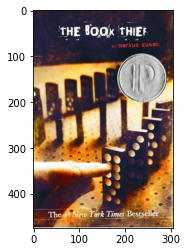

In [237]:
def plot_image(row):
    """
    input: row of the books dataset
    output: plotting corresponding image
    """
    assert isinstance(row, int)
    assert row >=0 and row < books.shape[0]
    url = books['image_url'].iloc[row]
    image = io.imread(url)
    plt.imshow(image)
    plt.show()
plot_image(5)

<div style="background-color:red;"><span style="color:navy;">Search for authors and books should be more robust and the whole author's names and the whole book's name shouldn't be required</span></div>

<div style="background-color:red;"><span style="color:navy;">Amazon's dataset do not match books. A better analysis should be done for matching these two.</span></div>